In [1]:
# Load libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import read_csv
from scipy import stats
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
import matplotlib.gridspec as gridspec
import gc

# Load Dataset

In [2]:
# Load dataset
file_location = r"C:\Users\Ikmal Syafiq\Desktop\train.csv"
df = read_csv(file_location)
df = pd.DataFrame(df)

In [3]:
#dataset preview
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44.0,1.0,28.0,0,> 2 Years,Yes,40454.0,26,217.0,1
1,2,Male,76.0,1.0,3.0,0,1-2 Year,No,33536.0,26,183.0,0
2,3,Male,47.0,1.0,28.0,0,> 2 Years,Yes,38294.0,26,27.0,1
3,4,Male,21.0,1.0,11.0,1,< 1 Year,No,28619.0,152,203.0,0
4,5,Female,29.0,1.0,41.0,1,< 1 Year,No,27496.0,152,39.0,0


# Data Cleaning

In [4]:
# Number of missing rows
print(df.isnull().sum())

id                      0
Gender                  2
Age                     3
Driving_License         2
Region_Code             2
Previously_Insured      0
Vehicle_Age             1
Vehicle_Damage          1
Annual_Premium          4
Policy_Sales_Channel    0
Vintage                 3
Response                0
dtype: int64


In [5]:
# Percetage of missing rows
print(100 * df.isnull().sum()/len(df))

id                      0.000000
Gender                  0.000525
Age                     0.000787
Driving_License         0.000525
Region_Code             0.000525
Previously_Insured      0.000000
Vehicle_Age             0.000262
Vehicle_Damage          0.000262
Annual_Premium          0.001050
Policy_Sales_Channel    0.000000
Vintage                 0.000787
Response                0.000000
dtype: float64


In [6]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381106.000000,381107.000000,381107.000000,381109.000000,381105.000000,381109.000000,381106.000000,381109.000000
mean,190555.000000,38.822666,0.997869,26.388812,0.458210,30564.150583,112.034295,154.346943,0.122563
std,110016.836208,15.511639,0.046110,13.229921,0.498251,17213.066470,54.203995,83.671188,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31668.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
#Change data type
for f in ['Vehicle_Age','Gender','Vehicle_Damage']:
    df[f] = df[f].map(str)  

In [8]:
# Using label encoder 
label_encoder = preprocessing.LabelEncoder()
for f in ['Age','Gender','Vehicle_Damage','Vehicle_Age']:
    df[f] = label_encoder.fit_transform(df[f]) 
print(df.head())

   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1       1   24              1.0         28.0                   0   
1   2       1   56              1.0          3.0                   0   
2   3       1   27              1.0         28.0                   0   
3   4       1    1              1.0         11.0                   1   
4   5       0    9              1.0         41.0                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0            2               1         40454.0                    26    217.0   
1            0               0         33536.0                    26    183.0   
2            2               1         38294.0                    26     27.0   
3            1               0         28619.0                   152    203.0   
4            1               0         27496.0                   152     39.0   

   Response  
0         1  
1         0  
2         1  
3         0  
4         

In [9]:
df.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381107.000000,381107.000000,381109.000000,381109.000000,381109.000000,381105.000000,381109.000000,381106.000000,381109.000000
mean,190555.000000,0.540769,18.823045,0.997869,26.388812,0.458210,0.516393,0.504879,30564.150583,112.034295,154.346943,0.122563
std,110016.836208,0.498346,15.512167,0.046110,13.229921,0.498251,0.577711,0.499982,17213.066470,54.203995,83.671188,0.327936
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,0.000000,5.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,1.000000,16.000000,1.000000,28.000000,0.000000,0.000000,1.000000,31668.000000,133.000000,154.000000,0.000000
75%,285832.000000,1.000000,29.000000,1.000000,35.000000,1.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,2.000000,68.000000,1.000000,52.000000,1.000000,3.000000,2.000000,540165.000000,163.000000,299.000000,1.000000


In [16]:
# Statistical Imputation: median
for f in ['Gender','Region_Code', 'Previously_Insured', 'Vehicle_Damage','Driving_License']:
    df[f] = df[f].fillna(df[f].median())

In [13]:
# Statistical Imputation: mean
for f in ['Age', 'Vehicle_Age', 'Annual_Premium','Vintage']:
    df[f] = df[f].fillna(df[f].mean())

In [14]:
# Statistical Imputation: mode
for f in ['Region_Code', 'Policy_Sales_Channel']:
    df[f] = df[f].fillna(df[f].mode())

In [17]:
# Number of missing rows
print(df.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


# Check multicollinearity

In [18]:
corr = df.iloc[:,1:].corr()

In [19]:
corr.style.background_gradient(cmap='coolwarm')

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Gender,1.000000,0.145528,-0.018373,0.000589,-0.081913,-0.112626,0.091592,0.003672,-0.111158,-0.002527,0.052433
Age,0.145528,1.000000,-0.079778,0.042587,-0.254679,-0.522267,0.267539,0.067497,-0.577805,-0.001275,0.111132
Driving_License,-0.018373,-0.079778,1.000000,-0.001081,0.014969,0.030173,-0.016622,-0.011907,0.043731,-0.000848,0.010155
Region_Code,0.000589,0.042587,-0.001081,1.000000,-0.024660,-0.027847,0.028241,-0.010582,-0.042420,-0.002753,0.010569
Previously_Insured,-0.081913,-0.254679,0.014969,-0.024660,1.000000,0.174789,-0.824139,0.004282,0.219381,0.002536,-0.341170
Vehicle_Age,-0.112626,-0.522267,0.030173,-0.027847,0.174789,1.000000,-0.174228,0.023657,0.388549,0.002469,-0.104079
Vehicle_Damage,0.091592,0.267539,-0.016622,0.028241,-0.824139,-0.174228,1.000000,0.009336,-0.224370,-0.002060,0.354394
Annual_Premium,0.003672,0.067497,-0.011907,-0.010582,0.004282,0.023657,0.009336,1.000000,-0.113229,-0.000613,0.022543
Policy_Sales_Channel,-0.111158,-0.577805,0.043731,-0.042420,0.219381,0.388549,-0.224370,-0.113229,1.000000,0.000004,-0.139042
Vintage,-0.002527,-0.001275,-0.000848,-0.002753,0.002536,0.002469,-0.002060,-0.000613,0.000004,1.000000,-0.001061


# Outlier detection and removal

In [20]:
new_data = df.copy()

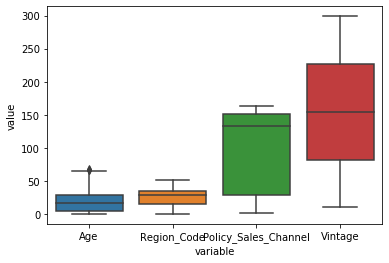

In [21]:
#detect outlier using boxplot
import seaborn as sns
pd_boxplot = df[['Age', 'Region_Code','Policy_Sales_Channel', 'Vintage']]
sns.boxplot(x="variable", y="value", data=pd.melt(pd_boxplot))

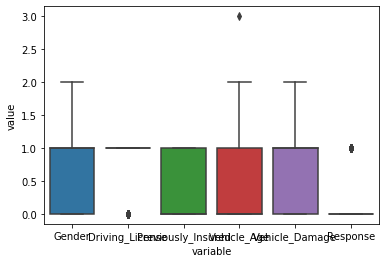

In [22]:
#detect outlier using boxplot
import seaborn as sns
pd_boxplot = df[['Gender', 'Driving_License', 'Previously_Insured','Vehicle_Age','Vehicle_Damage' ,'Response' ]]
sns.boxplot(x="variable", y="value", data=pd.melt(pd_boxplot))

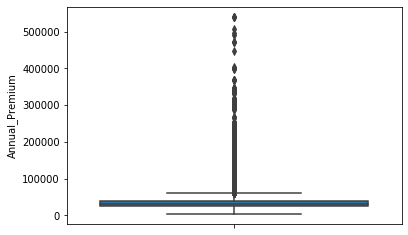

In [23]:
sns.boxplot( y=df["Annual_Premium"] );
plt.show()

In [24]:
#Removing outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
new_data = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
new_data = pd.DataFrame(new_data)

print("Outlier removed data shape " + str(new_data.shape))
print("Outlier not removed data shape " + str(df.shape))
rows_removed = df.shape[0] - new_data.shape[0]
print('Rows removed ' + str(rows_removed))

Outlier removed data shape (324907, 12)
Outlier not removed data shape (381109, 12)
Rows removed 56202
